In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Make sure data has questions labeled by Letter
# Create a .csv file that contains the mapping of questions to letters

datafile = "data_11_5"
questionsfile = "questions"

In [14]:
# Format the data with 1s corresponding to 'OK', 0s corresponding to 'Not OK', delete subjects who didn't answer fully

df = pd.read_csv(datafile + '.csv')
df.dropna(inplace = True)
df = df.replace("I think it's okay to lie here.",1)
df = df.replace("I think it's not okay to lie here.",0)

In [15]:
# Create a dictionary from Letter to text of the survey question
# This is actually a dictionary of one element dictionaries, which isn't ideal but fine for now

qs = pd.read_csv(questionsfile + '.csv')
qsDict = qs.to_dict()

In [16]:
# Given a list of questions, return proportions of OK/Not OKs along with how many said each

def pareByMul(stuff, questions):
    ys = stuff[questions].sum(axis=1).sum()
    tots = (len(questions)*len(stuff))
    ps = ys / tots
    return pd.Series({'OK':ps, 'Not OK':1 - ps, 'Count':(tots/len(questions))})


# Given a list of questions and a list of demographic slices, use pareByMul to see the survey
# responses pared down by demographic data
def look_at(questions, slices):
    return df.groupby(slices).apply(pareByMul, questions)

In [17]:
# Plot the OK/Not OK responses to certain questions, pared down by a certain slice of demographic
# data (Race, Gender, Year, etc.) and comparing specific segments of that demographic, i.e.
# White vs. Asian vs. Black, or Male vs. Female vs. Nonbinary, etc.
# Currently doesn't support multiple-layer analysis, i.e. Black Females vs. White Males

def chart(questions, slices, segments):
    fig, ax = plt.subplots(1,4, figsize = (12,5))
    fig.suptitle("Do you think it is okay to lie in the following situation "
                + str(questions) + ": \n"
                + qsDict[questions[0]][0])
    
    data = look_at(questions, slices)
    fullData = pd.DataFrame(pareByMul(df, questions))
    
    for i in range(len(segments)):
        ax[i].pie(data[['OK','Not OK']].transpose()[segments[i]],
                 labels = ['OK', 'Not OK'],
                 colors = ['steelblue', 'orange'],
                 autopct='%1.1f%%')
        ax[i].set_title(segments[i] + " (" + 
                        str(data.Count[segments[i]])
                       + ")")
        ax[3].pie(fullData.transpose()[['OK','Not OK']],
                labels = ['OK', 'Not OK'],
                colors = ['steelblue', 'orange'],
                autopct='%1.1f%%')
        ax[3].set_title("Total Population (" + str(fullData.get_value('Count', 0)) + ")")

# Plot the OK/Not OK responses as above, but do it for all questions at once.        

def all_charts(slices, segments):
    for i in string.ascii_uppercase[:15]:
        chart([i], slices, segments)

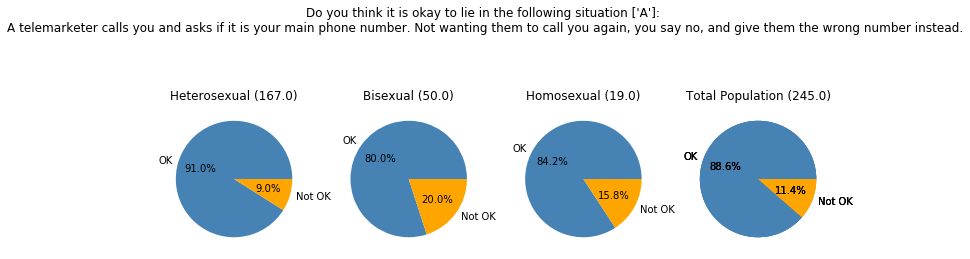

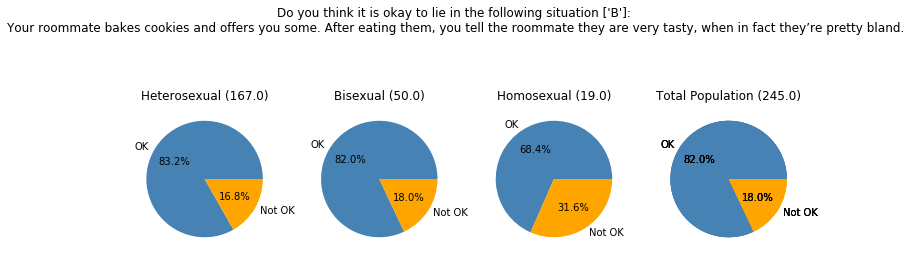

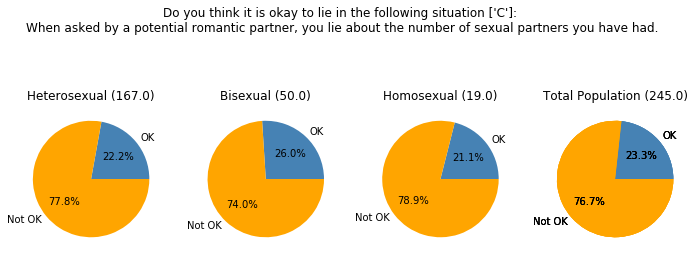

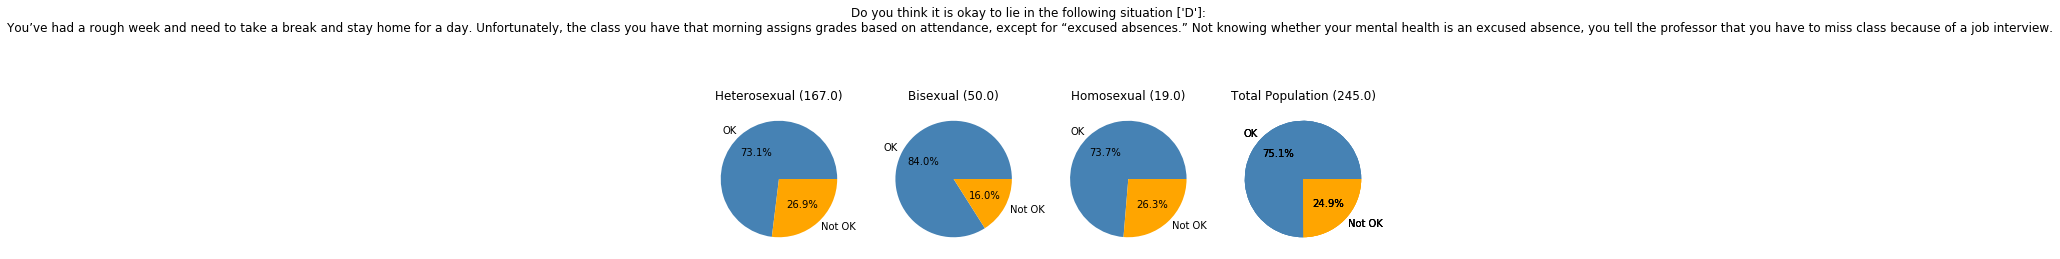

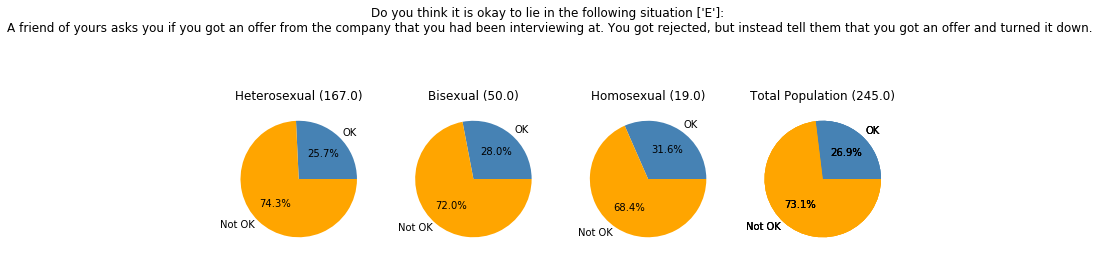

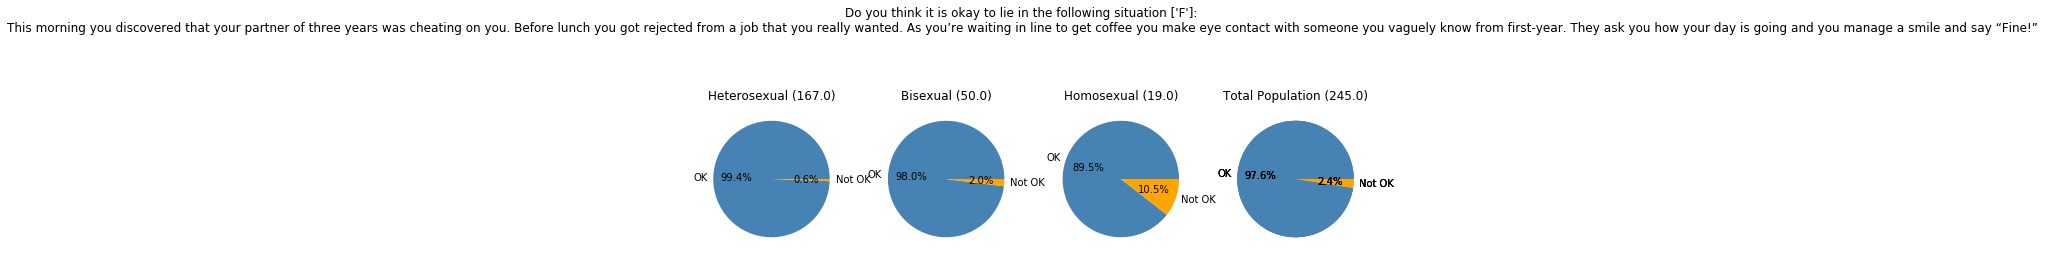

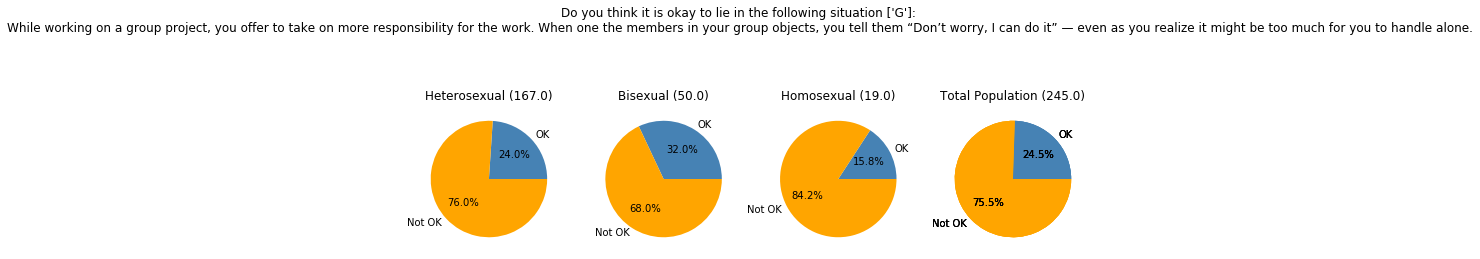

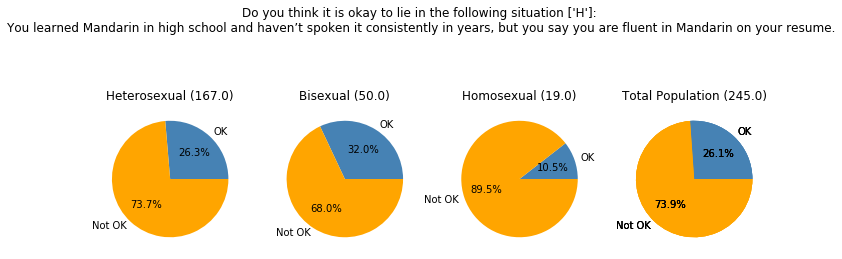

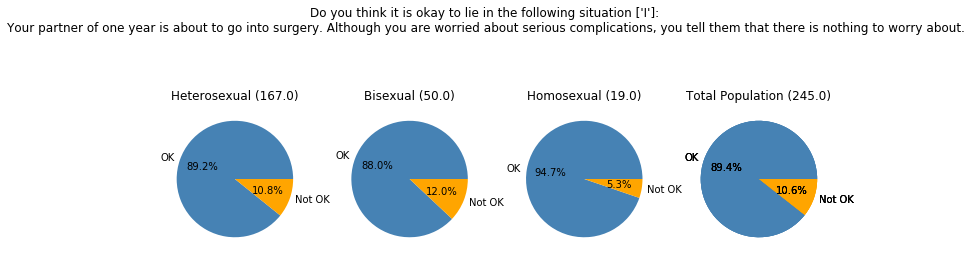

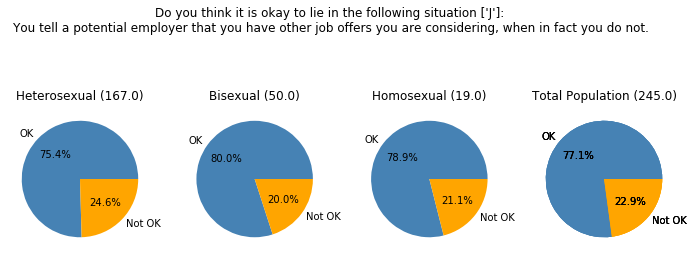

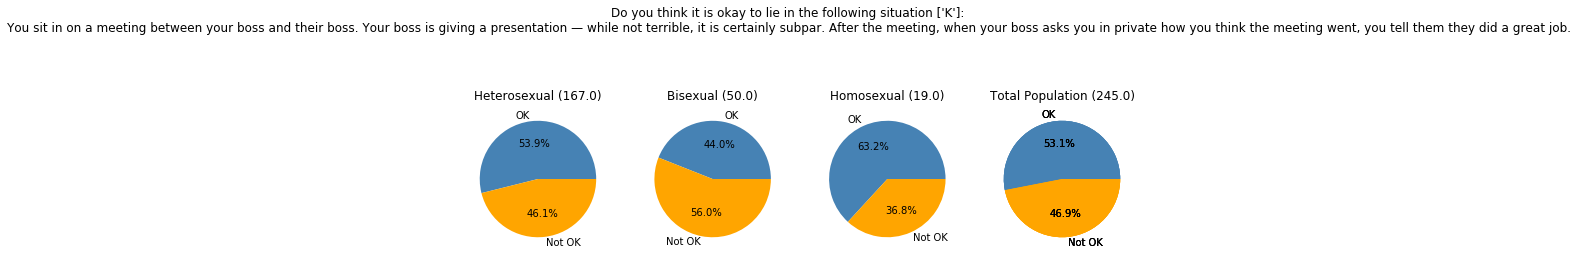

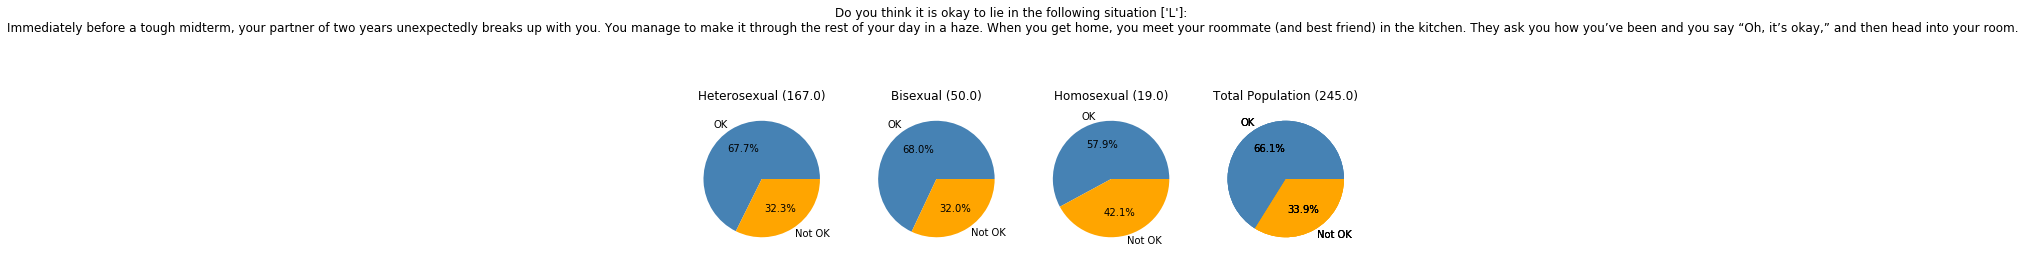

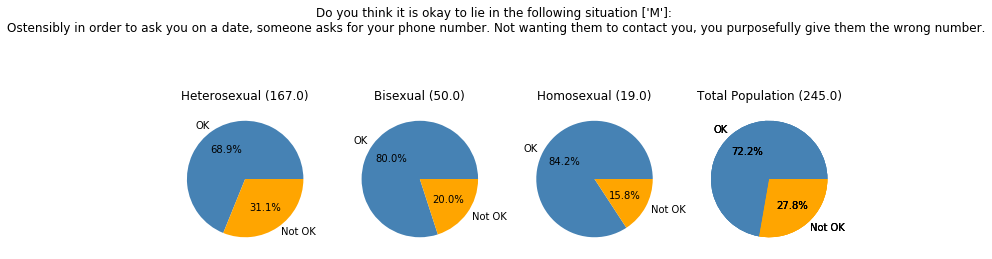

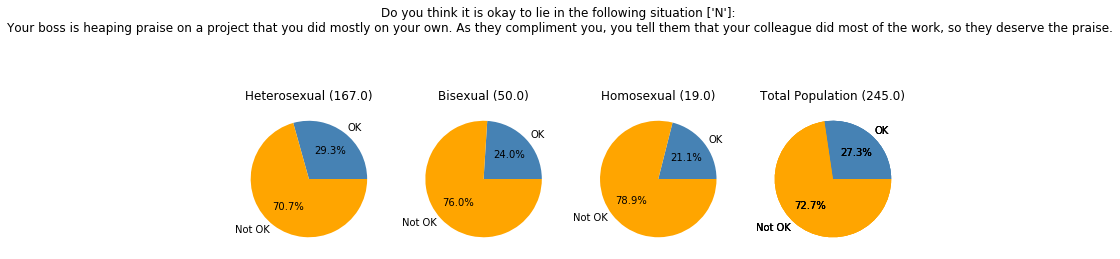

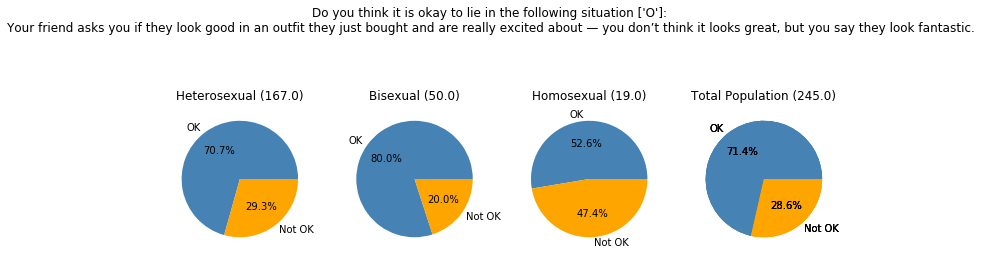

In [18]:
all_charts(['Orientation'], ['Heterosexual', 'Bisexual', 'Homosexual'])

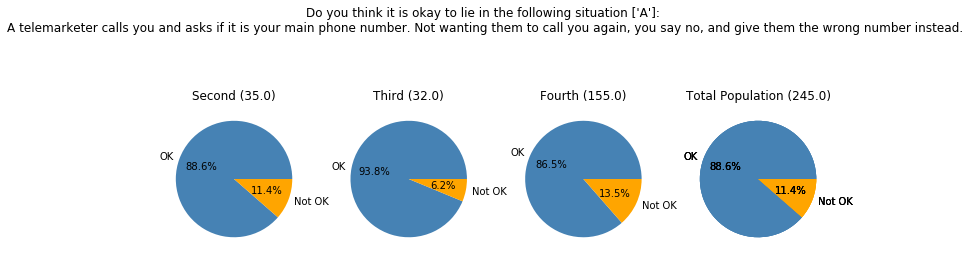

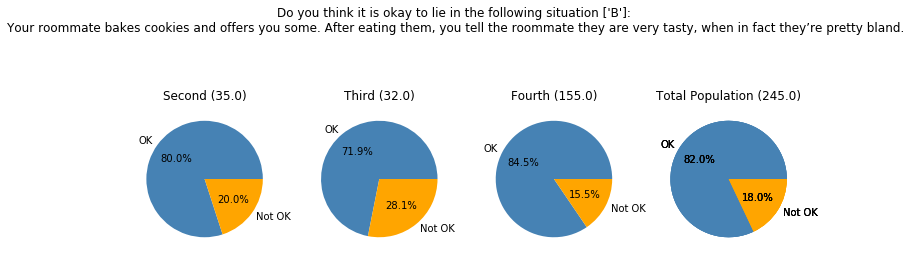

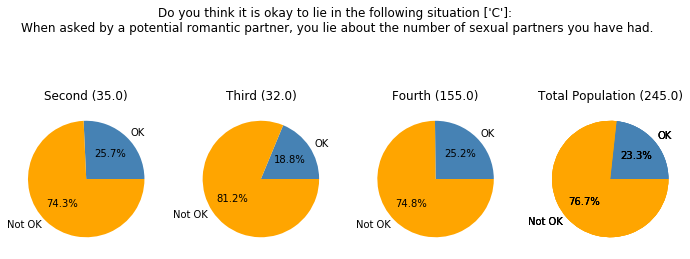

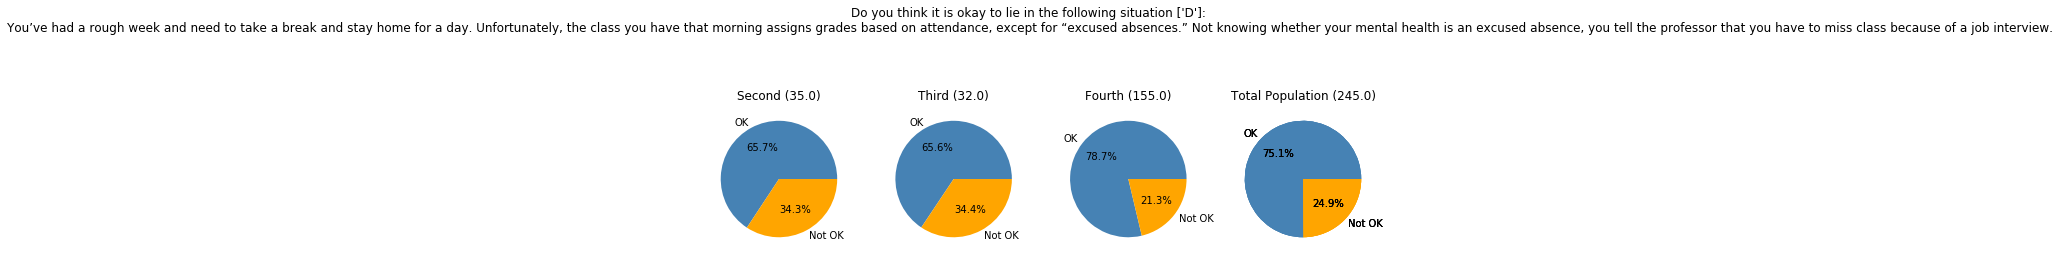

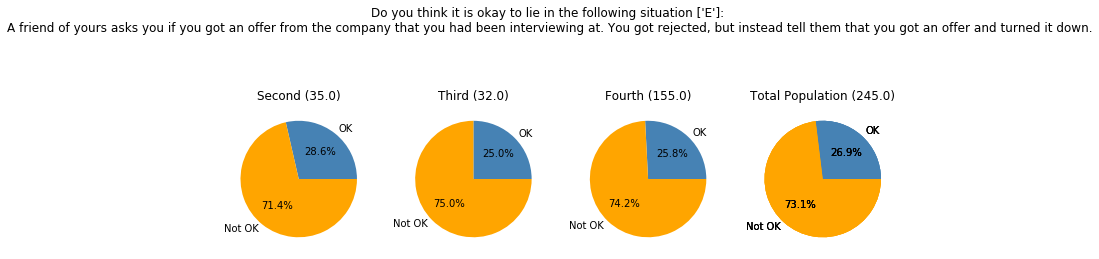

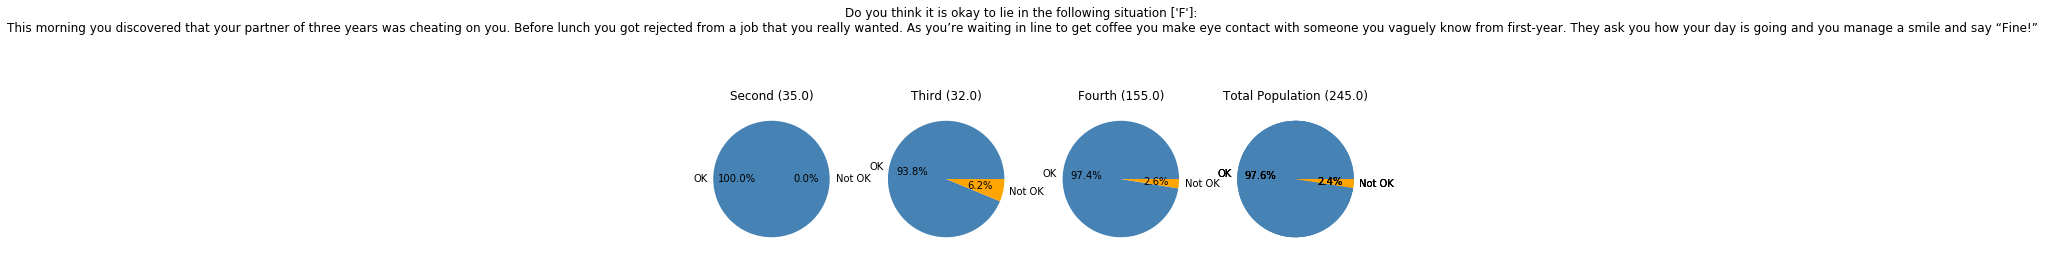

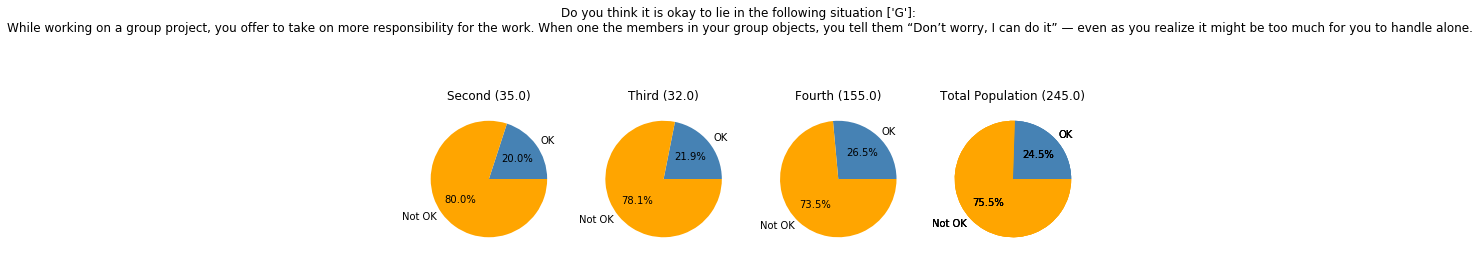

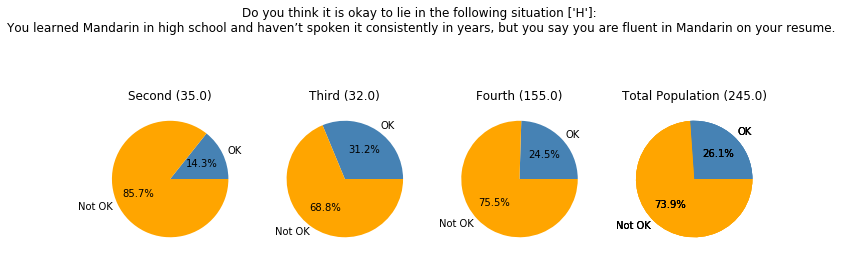

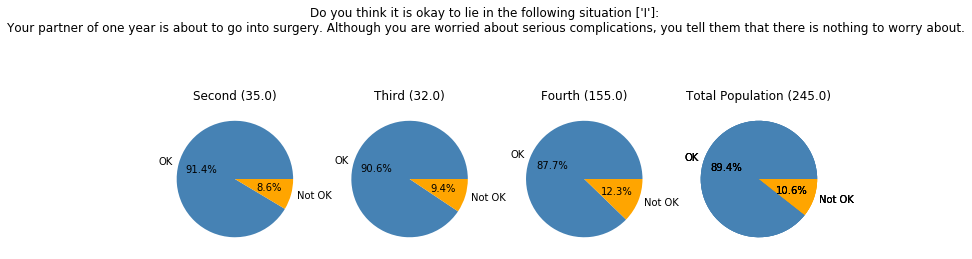

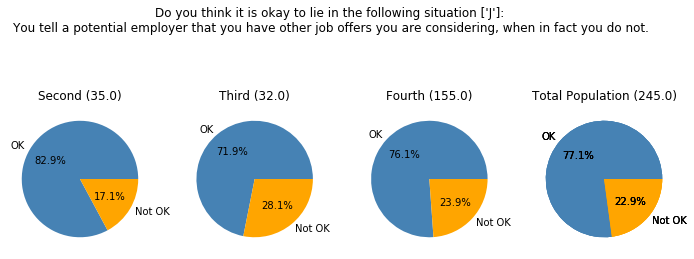

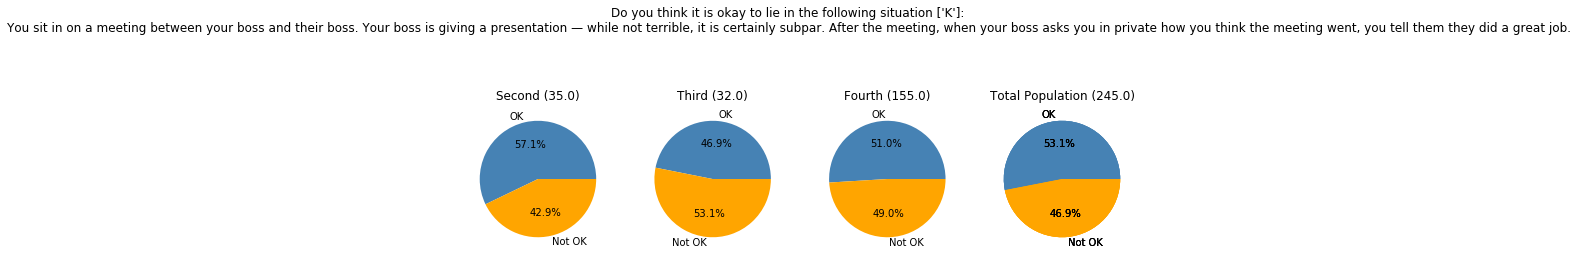

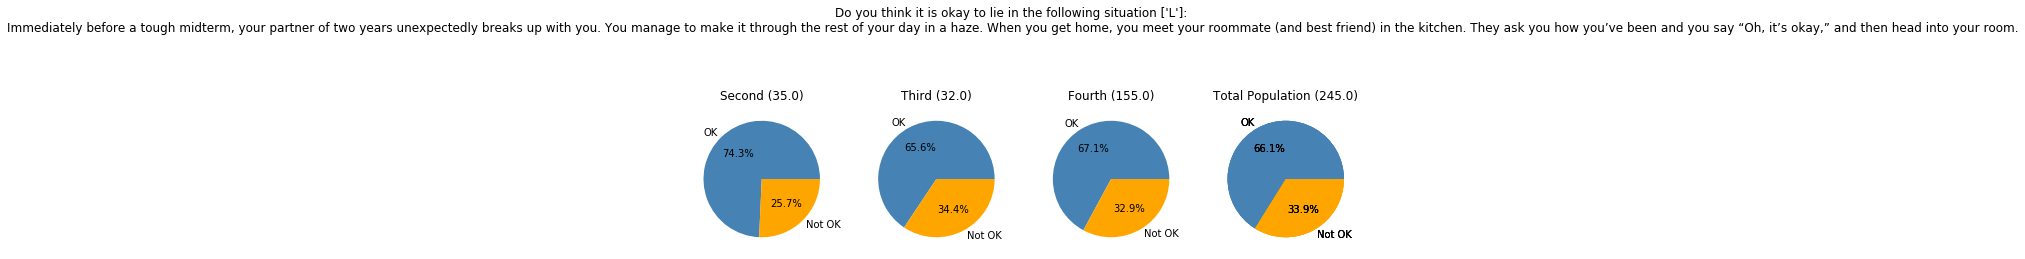

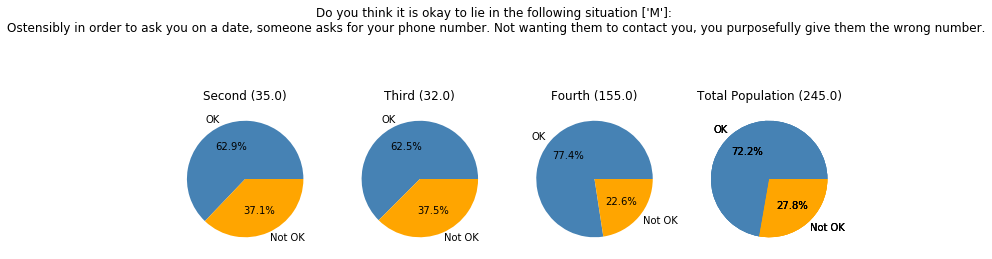

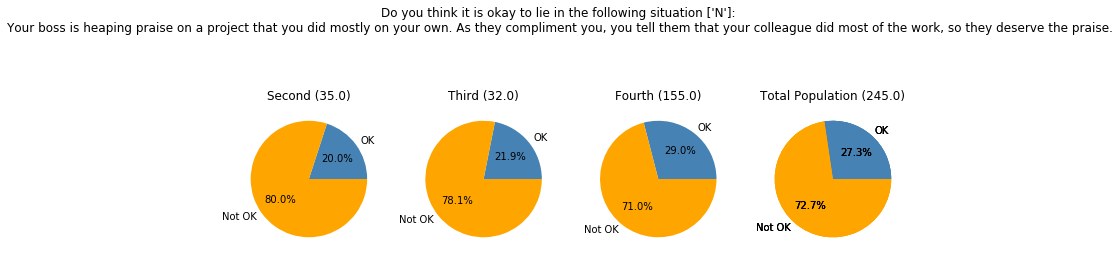

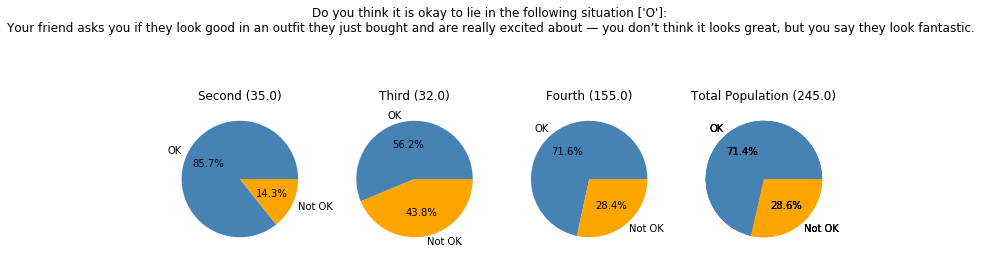

In [19]:
all_charts(['Year'], ['Second', 'Third', 'Fourth'])

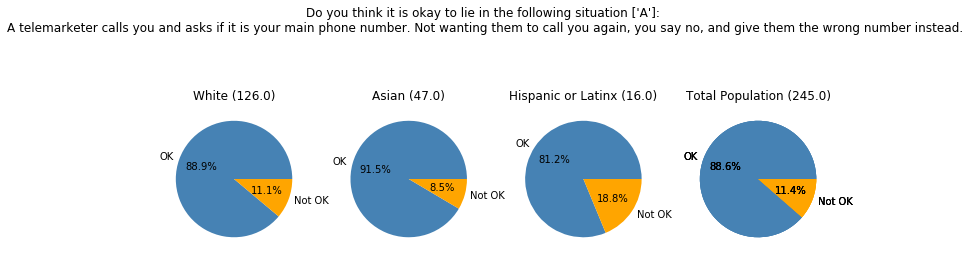

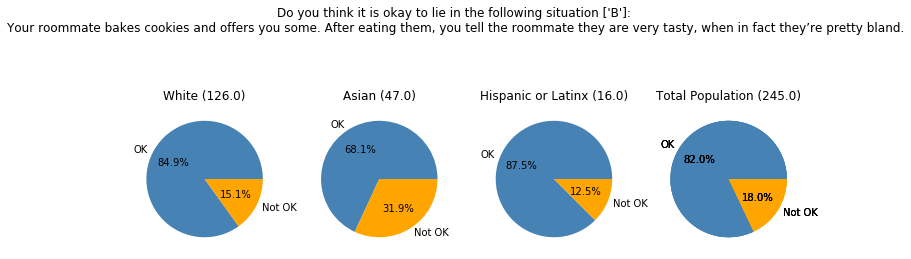

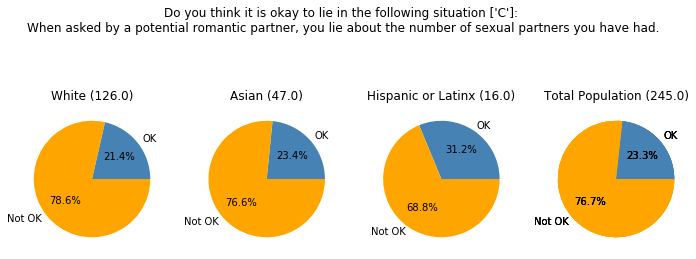

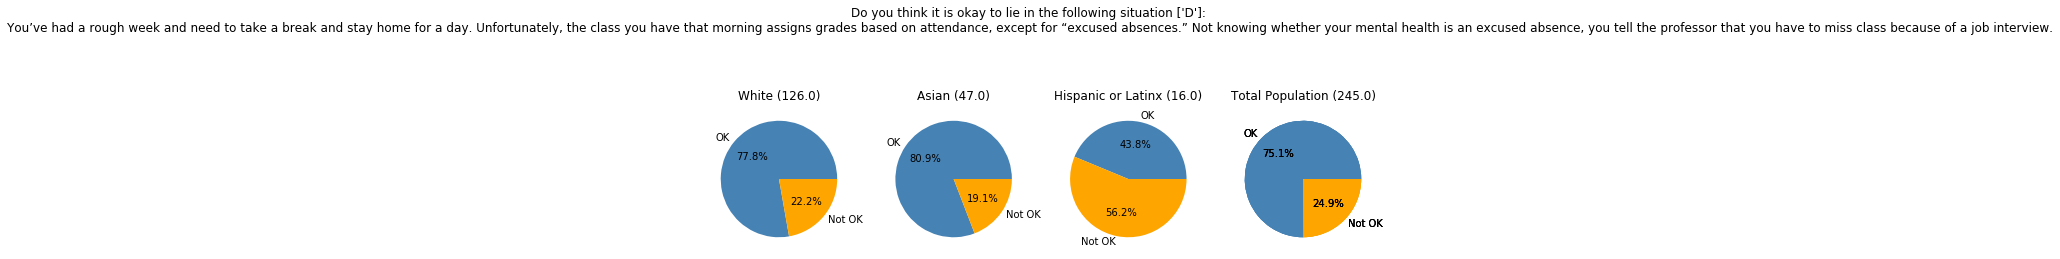

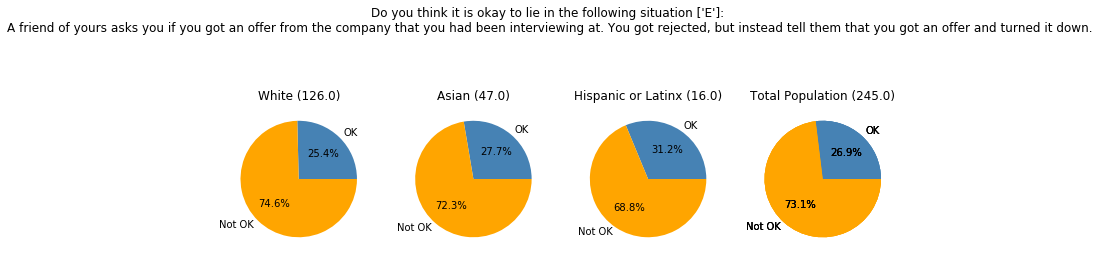

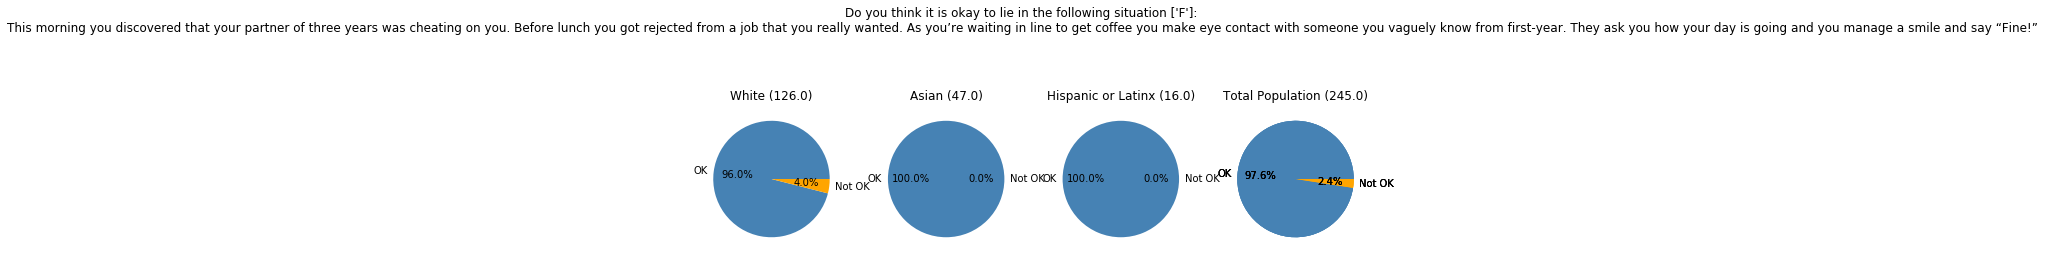

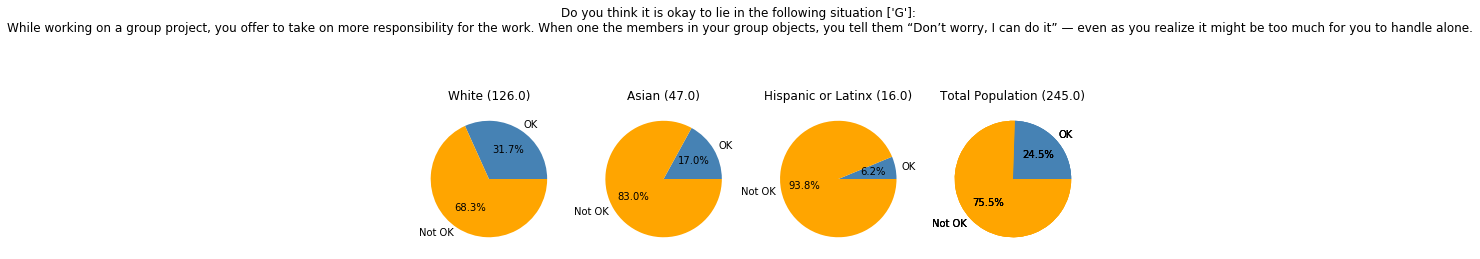

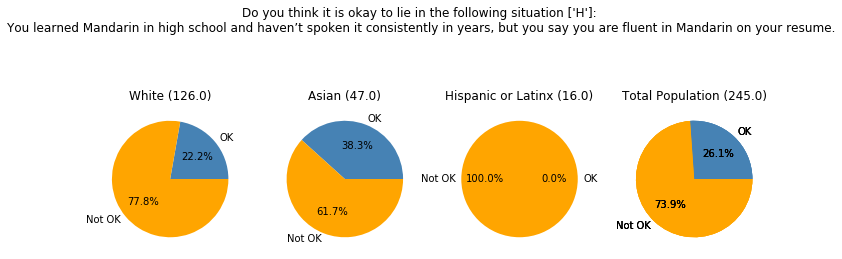

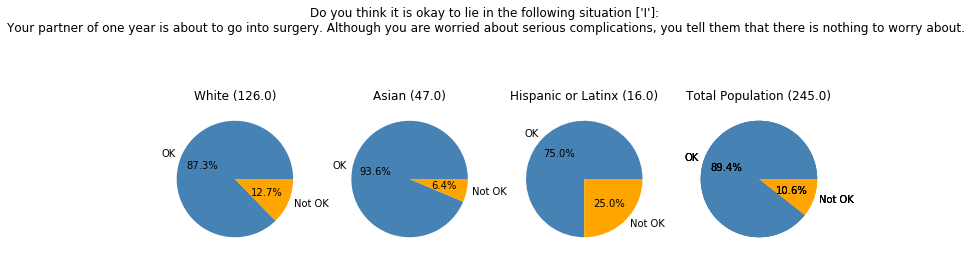

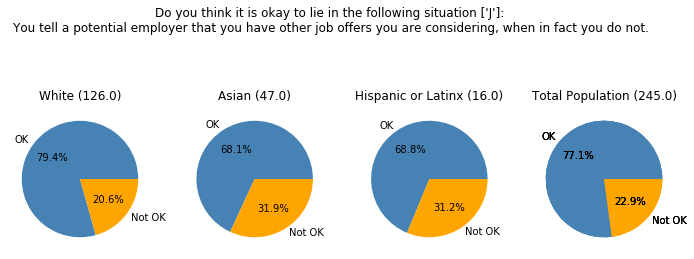

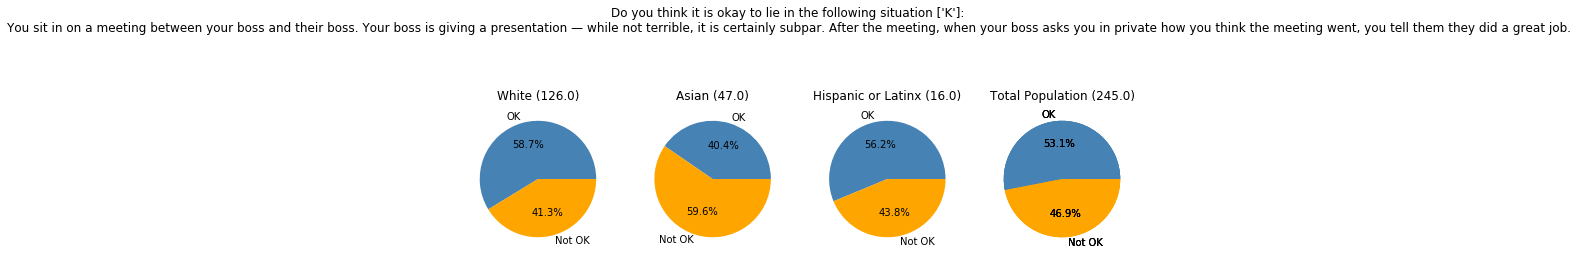

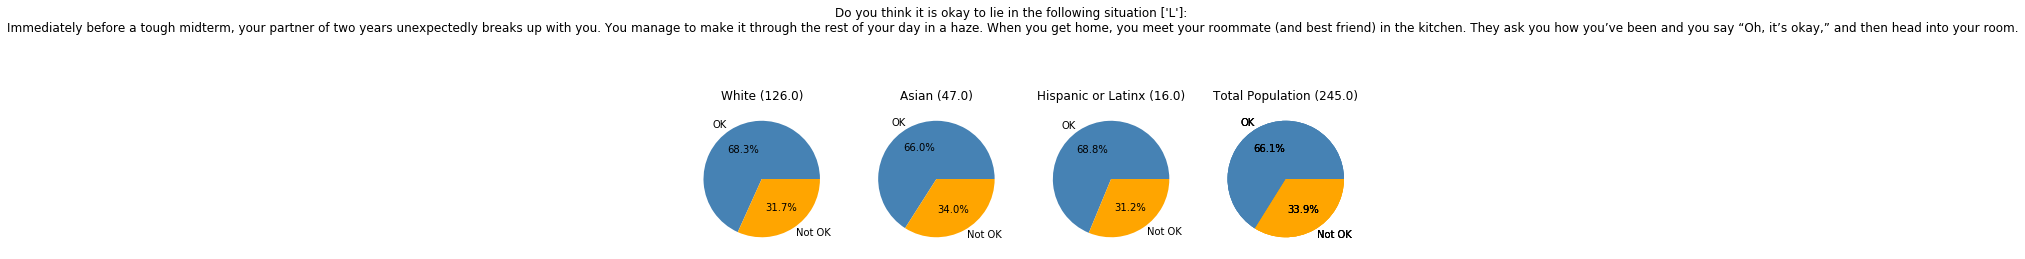

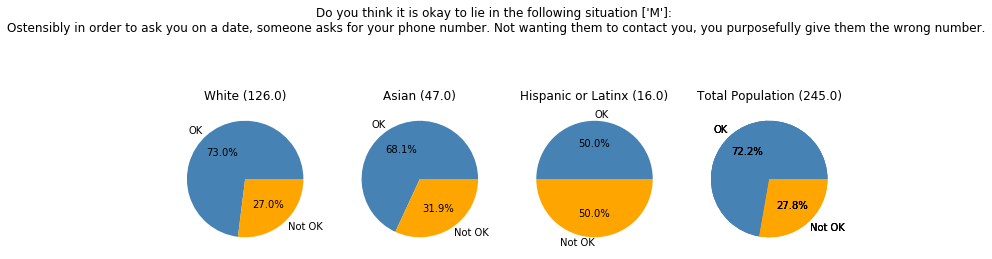

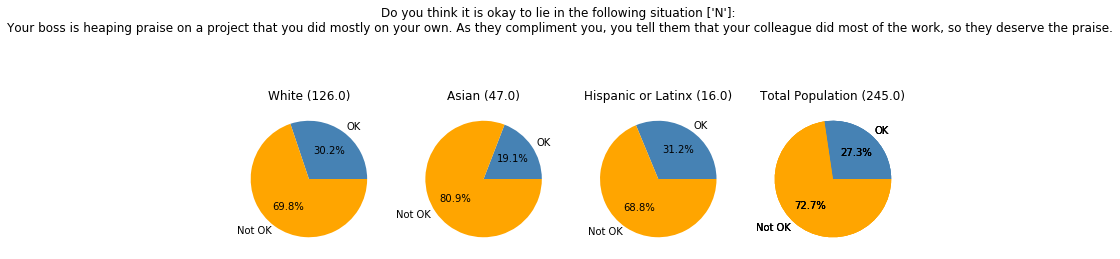

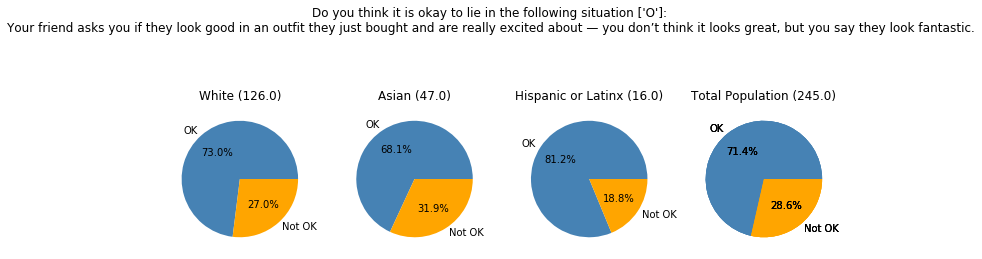

In [22]:
all_charts(['Race'], ['White', 'Asian', 'Hispanic or Latinx'])

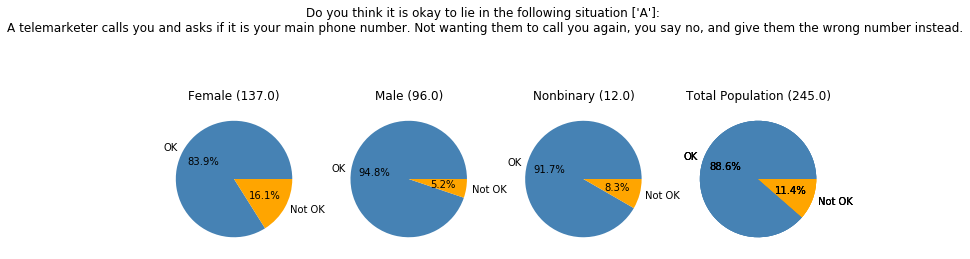

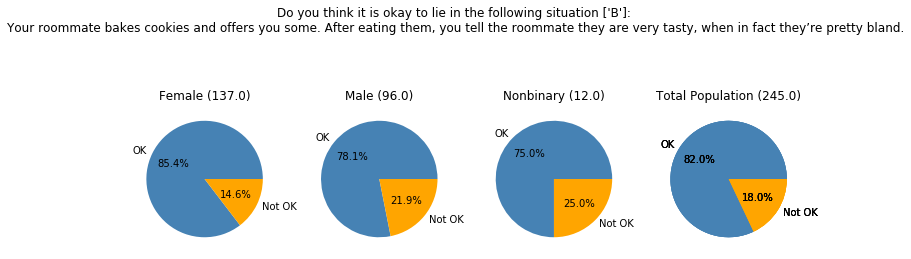

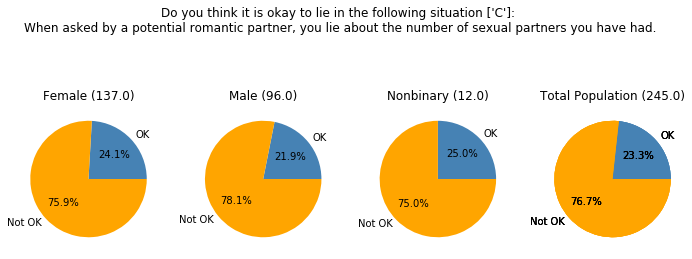

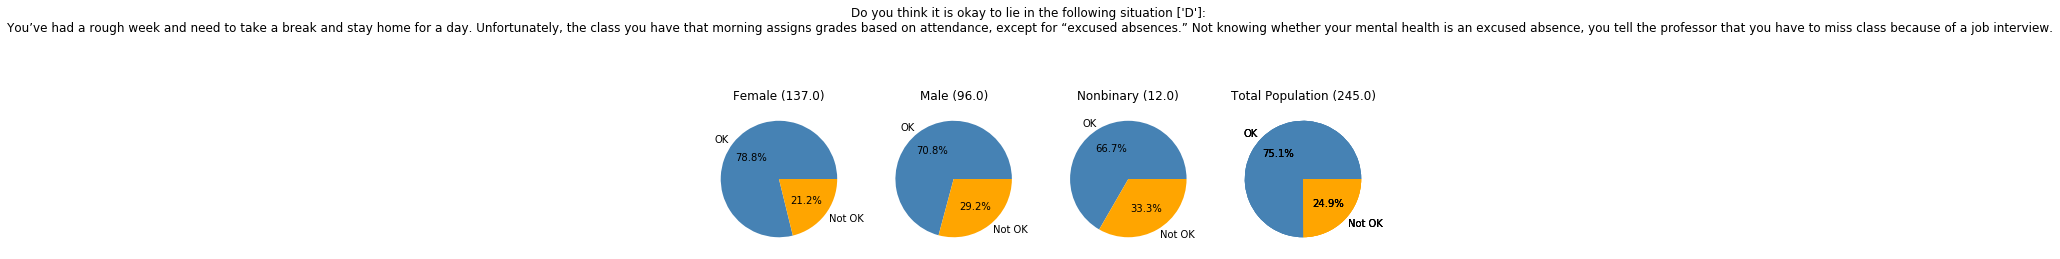

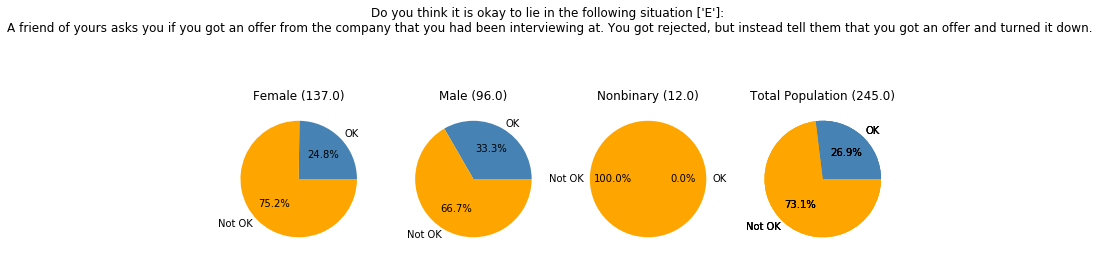

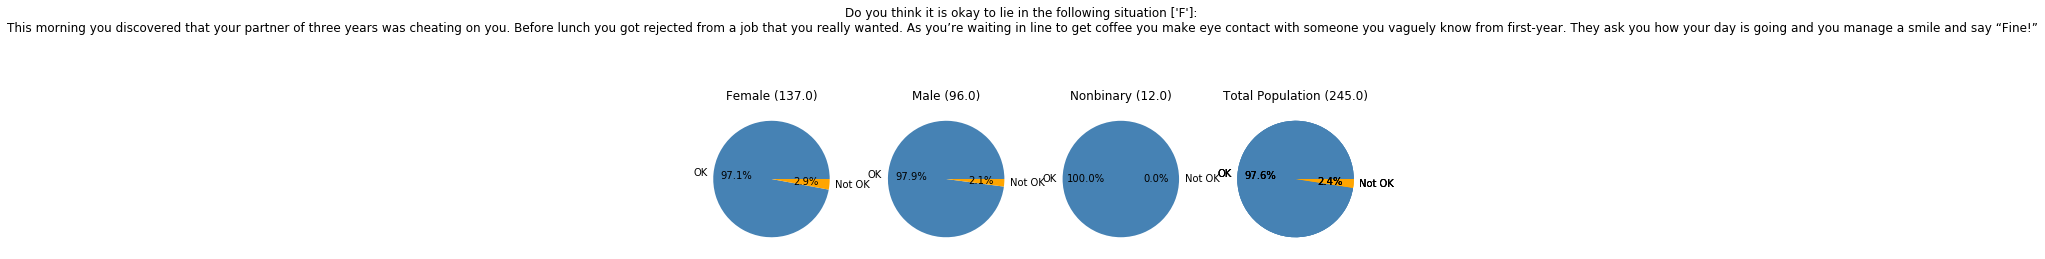

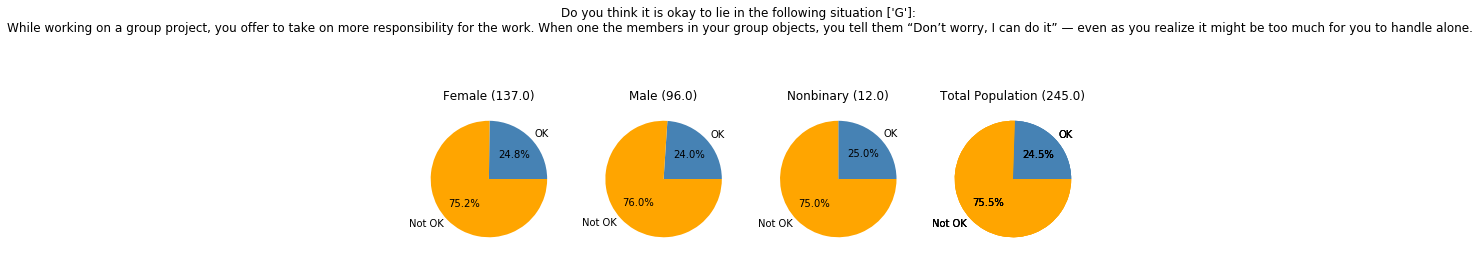

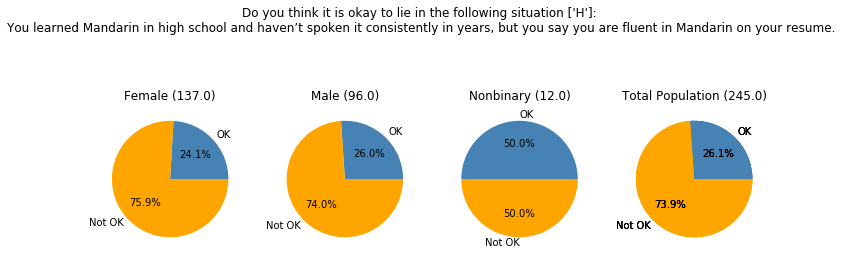

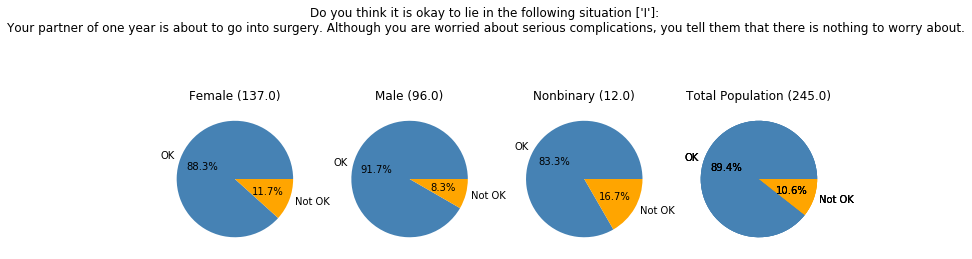

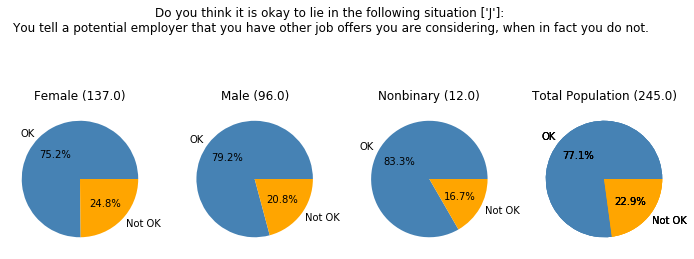

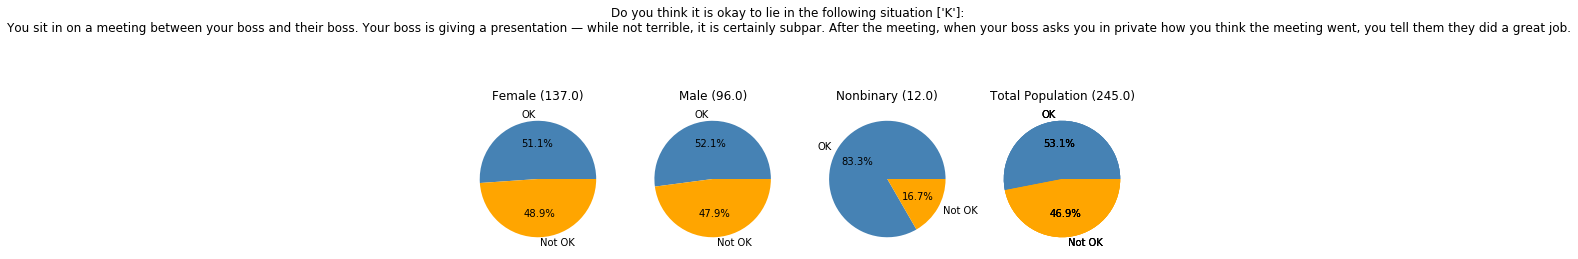

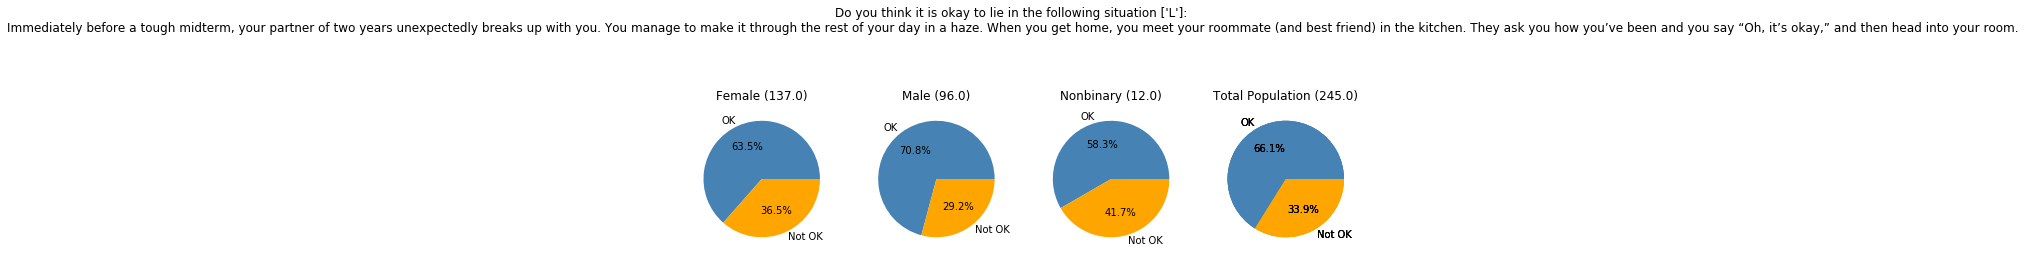

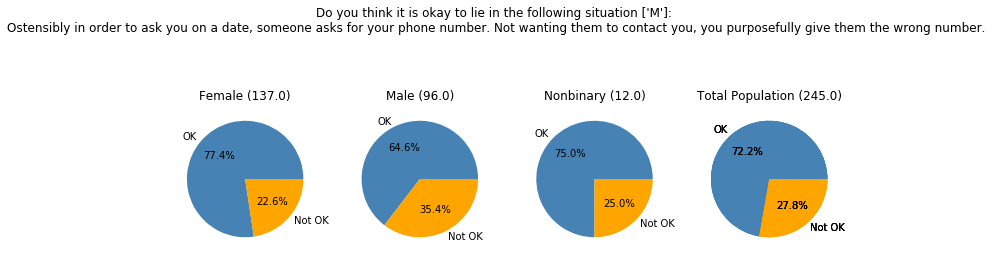

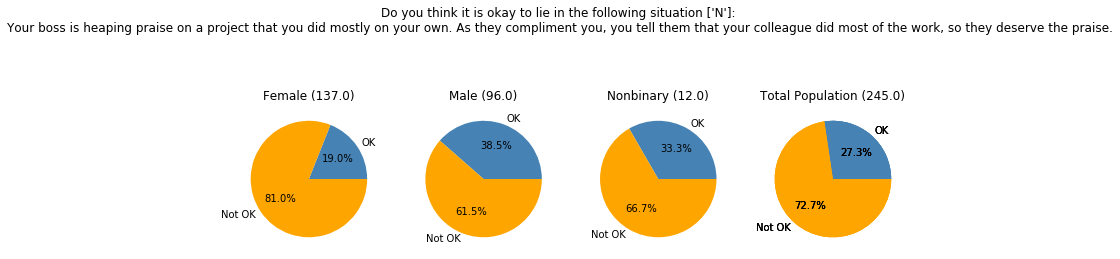

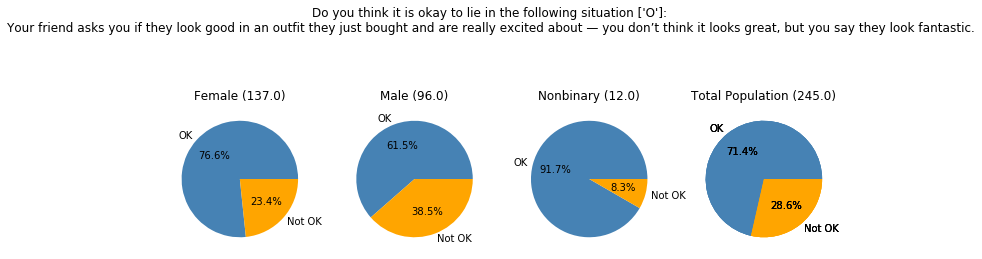

In [21]:
all_charts(['Gender'], ['Female', 'Male', 'Nonbinary'])